In [80]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, f1_score, plot_confusion_matrix, accuracy_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('my_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])

# EDA

### Audio Features

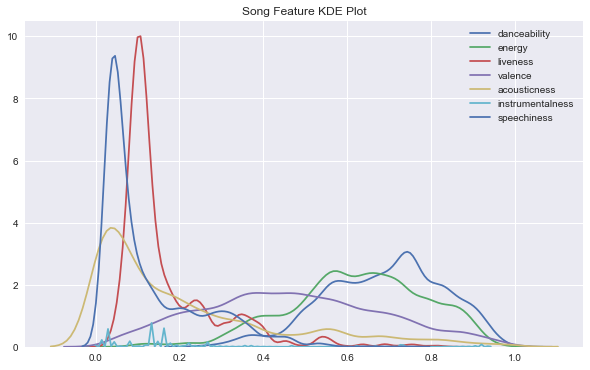

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(df['danceability'])
sns.kdeplot(df['energy'])
sns.kdeplot(df['liveness'])
sns.kdeplot(df['valence'])
sns.kdeplot(df['acousticness'])
sns.kdeplot(df['instrumentalness'])
sns.kdeplot(df['speechiness'])
plt.title('Song Feature KDE Plot')
plt.show()

plt.savefig('audio_feats.png')

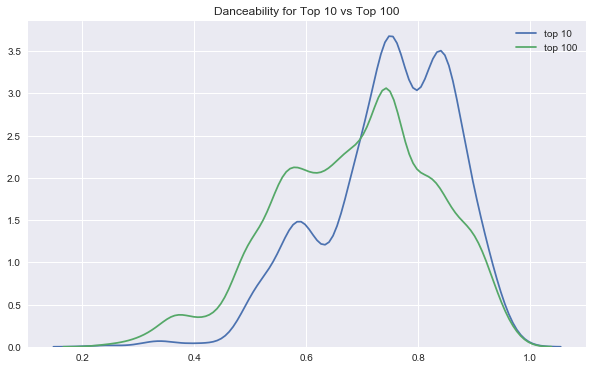

<Figure size 432x288 with 0 Axes>

In [4]:
# comparing danceability between top 25 songs and top 100
top_ten = df[df['Weekly.rank']<=10]


fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['danceability'], label = 'top 10')
sns.kdeplot(df['danceability'], label = 'top 100')
plt.title('Danceability for Top 10 vs Top 100')
plt.show()

plt.savefig('danceability.png')

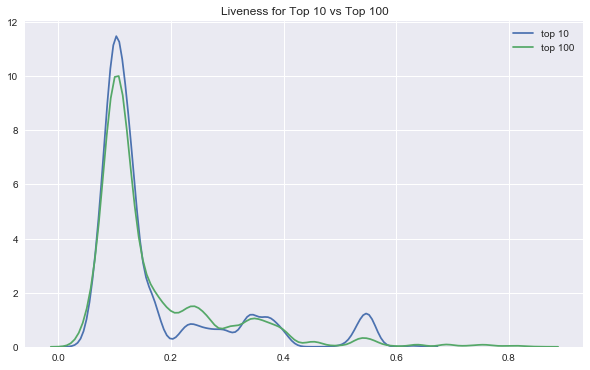

<Figure size 432x288 with 0 Axes>

In [5]:
# comparing liveness of songs in the top 25 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['liveness'], label = 'top 10')
sns.kdeplot(df['liveness'], label = 'top 100')
plt.title('Liveness for Top 10 vs Top 100')
plt.show()

plt.savefig('liveness.png')

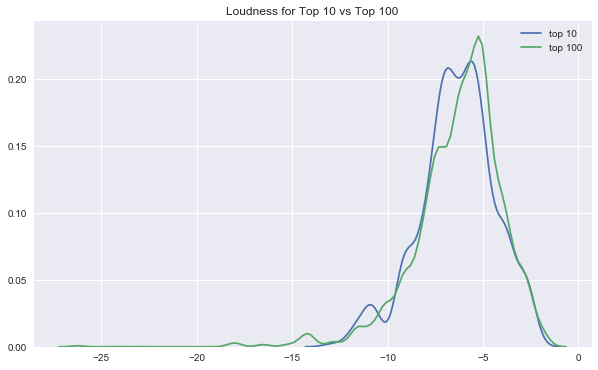

<Figure size 432x288 with 0 Axes>

In [6]:
# comparing liveness of songs in the top 25 vs top 100 
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['loudness'], label = 'top 10')
sns.kdeplot(df['loudness'], label = 'top 100')
plt.title('Loudness for Top 10 vs Top 100')
plt.show()

plt.savefig('loudness.png')

In [7]:
audio_df = df[['Weekly.rank','danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

In [8]:
audio_df.corr()

,Weekly.rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Weekly.rank,1.000000,-0.184819,0.072266,-0.003886,-0.012191,-0.009541,-0.013340,0.048090,0.028500,0.024796,0.032982,0.069533,0.007246,-0.022701
danceability,-0.184819,1.000000,-0.054431,-0.045347,-0.013078,-0.159292,0.354922,-0.235260,-0.032057,0.032858,0.180359,-0.022351,-0.174365,0.146580
energy,0.072266,-0.054431,1.000000,0.038048,0.719461,-0.024074,-0.049442,-0.517496,-0.096729,0.078162,0.389917,0.124526,0.002750,0.091299
key,-0.003886,-0.045347,0.038048,1.000000,-0.026506,-0.122396,0.033413,-0.002165,-0.010423,-0.134258,0.038316,-0.111613,-0.028497,-0.011958
loudness,-0.012191,-0.013078,0.719461,-0.026506,1.000000,-0.036716,-0.163389,-0.398422,-0.240373,-0.002618,0.266795,0.107930,-0.011831,0.024309
mode,-0.009541,-0.159292,-0.024074,-0.122396,-0.036716,1.000000,-0.204676,0.073585,0.007393,-0.056804,0.036560,0.043151,0.093005,-0.023650
speechiness,-0.013340,0.354922,-0.049442,0.033413,-0.163389,-0.204676,1.000000,-0.143136,0.000912,0.067027,-0.033853,0.147742,-0.133180,0.048570
acousticness,0.048090,-0.235260,-0.517496,-0.002165,-0.398422,0.073585,-0.143136,1.000000,0.097711,-0.155233,-0.117559,-0.130618,-0.032836,-0.037640
instrumentalness,0.028500,-0.032057,-0.096729,-0.010423,-0.240373,0.007393,0.000912,0.097711,1.000000,-0.005873,-0.045162,0.032308,-0.048835,-0.001904
liveness,0.024796,0.032858,0.078162,-0.134258,-0.002618,-0.056804,0.067027,-0.155233,-0.005873,1.000000,0.009463,-0.012398,-0.007693,-0.018119


### Genres

In [9]:
genres = []
for row in df['Genre']: 
    genres.extend(row.split('|'))
genre_dict = {}
for genre in genres:
    if genre in genre_dict: 
        genre_dict[genre] += 1
    else:
        genre_dict[genre] = 1
# creating df 
genres = {'Genre': list(genre_dict.keys()), 'Count': list(genre_dict.values())}
genre_df = pd.DataFrame(genres)
sorted_genres = genre_df.sort_values(by='Count',ascending=False)

In [10]:
sorted_genres

,Genre,Count
17,Country,1195
42,Rap,444
18,"Trap,Rap",301
32,"R&;B,Pop",146
1,Pop,139
...,...,...
275,"Trap,Alternative R&;B,R&;B,Rap",1
276,"West Coast,East Coast,Rap",1
277,"Trap,UK,Rap",1
304,"Electro,Pop,Dance,Electronic,Electro-Pop,Deuts...",1


In [11]:
genre_df = sorted_genres[sorted_genres['Count']>=50]
genre_df

,Genre,Count
17,Country,1195
42,Rap,444
18,"Trap,Rap",301
32,"R&;B,Pop",146
1,Pop,139
135,"Motown,Trap,Rap",120
10,"Pop,Rap",81
114,"UK,R&;B",78
123,"Cloud Rap,Trap,Rap",69
197,"Trap,Canada,Rap",62


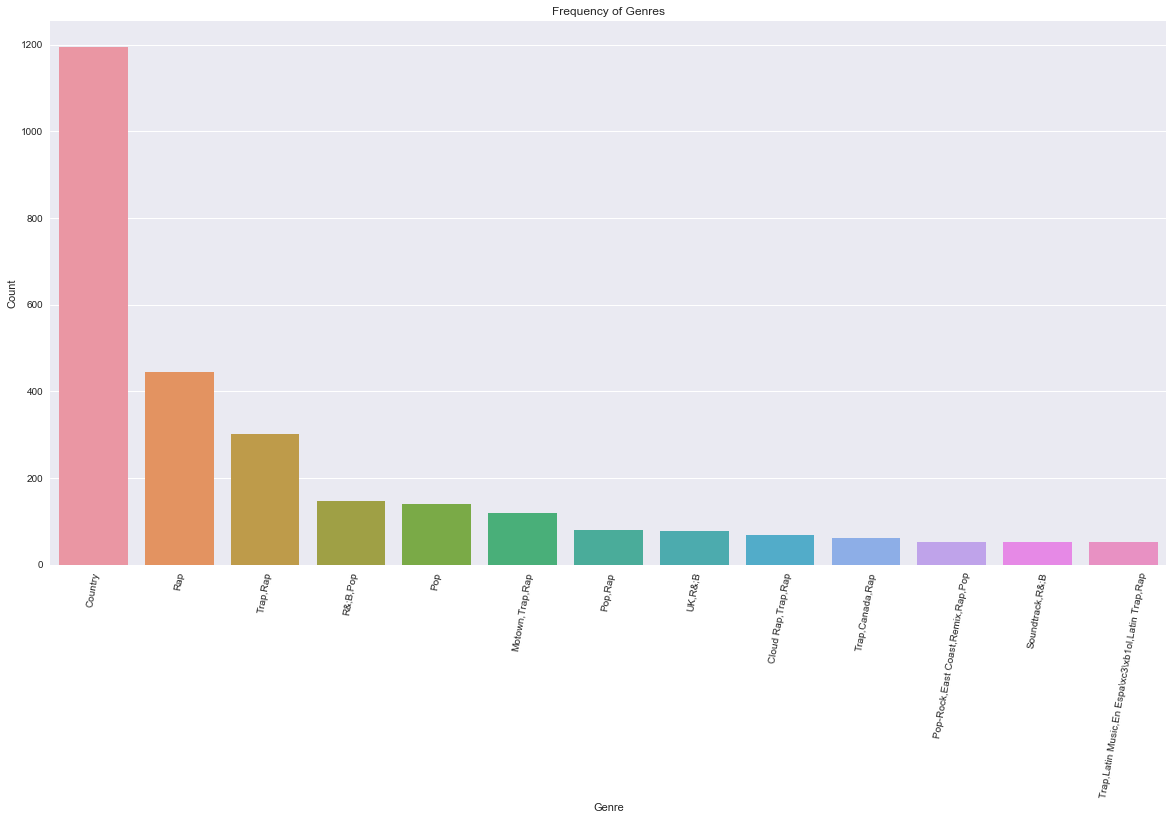

In [12]:
# barplot of genres
x = genre_df['Genre']
y = genre_df['Count']

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x,y)
sns.barplot(x,y)

ax.set_xticklabels(x,rotation=80)
ax.set_ylabel("Count")
ax.set_title("Frequency of Genres");

# Modeling

## Preprocessing

In [14]:
# creating 'Top_10' column 
df['Top_10']= np.where(df['Weekly.rank']<=10,1,0)

In [44]:
# df with the features I want to use for modeling
df = df[['Artists','Name','Weekly.rank', 'Peak.position', 'Weeks.on.chart',
       'Genre', 'Lyrics', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri',
       'duration_ms', 'time_signature','Top_10']]

In [45]:
X = df.drop(columns=['Top_10'])
y = df['Top_10']

In [46]:
X.isna().sum()

Artists               0
Name                  0
Weekly.rank           0
Peak.position       804
Weeks.on.chart      804
Genre                 0
Lyrics                0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
id                    0
uri                   0
duration_ms           0
time_signature        0
dtype: int64

In [47]:
# splitting up my continuous and categorical columsn 
continuous = ['Weekly.rank','Peak.position', 'Weeks.on.chart','danceability', 'energy', 'loudness', 'mode', 
            'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo','duration_ms','time_signature']
categorical = [x for x in X.columns if x not in continuous]

In [48]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [49]:
# standard scalar for continuous features 
scaler = StandardScaler()
_X_train_cont = scaler.fit_transform(X_train[continuous])
_X_train_cont_df = pd.DataFrame(data = _X_train_cont,
                         columns = continuous)

_X_test_cont = scaler.transform(X_test[continuous])
_X_test_cont_df = pd.DataFrame(data = _X_test_cont,
                         columns = continuous)

In [50]:
# one hot encoder for categorical features 
ohe = OneHotEncoder(handle_unknown = 'ignore')
_X_train_ohe = ohe.fit_transform(X_train[categorical]).toarray()
_X_train_ohe_df = pd.DataFrame(data = _X_train_ohe,
                        columns = ohe.get_feature_names(categorical))

_X_test_ohe = ohe.transform(X_test[categorical]).toarray()
_X_test_ohe_df = pd.DataFrame(data = _X_test_ohe,
                        columns = ohe.get_feature_names(categorical))

In [51]:
# merging features 
_X_test_merged = _X_test_cont_df[continuous].merge(_X_test_ohe_df, left_index=True, right_index=True)
_X_train_merged = _X_train_cont_df[continuous].merge(_X_train_ohe_df, left_index=True, right_index=True)
_X_train_merged.shape

(6172, 4146)

In [59]:
# oversampling with SMOTE
_smote = SMOTE(sampling_strategy='minority', random_state=42)
_X_train_merged, y_train = _smote.fit_sample(_X_train_merged, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
y_train.describe

<bound method NDFrame.describe of 7074    0
3384    0
3078    0
1933    0
386     0
       ..
5032    0
1378    0
757     0
2670    1
5725    0
Name: Top_10, Length: 6172, dtype: int64>

## Dummy Classifier

In [54]:
dummy_clf = DummyClassifier(strategy='constant', constant=0)
dummy_clf.fit(_X_train_merged, y_train)
dummy_train_pred = dummy_clf.predict(_X_train_merged)
dummy_pred = dummy_clf.predict(_X_test_merged)

print('Training Accuracy: ', accuracy_score(y_train, dummy_train_pred))
print('Testing Accuracy: ',accuracy_score(y_test, dummy_pred))
print('\n\n')
print('Training F1-Score: ', f1_score(y_train, dummy_train_pred))
print('Testing F1-Score: ', f1_score(y_test, dummy_pred))
print('\n\n')
print('Training Recall: ', recall_score(y_train, dummy_train_pred))
print('Testing Recall: ',recall_score(y_test, dummy_pred))

Training Accuracy:  0.9001944264419961
Testing Accuracy:  0.8878807517822424



Training F1-Score:  0.0
Testing F1-Score:  0.0



Training Recall:  0.0
Testing Recall:  0.0


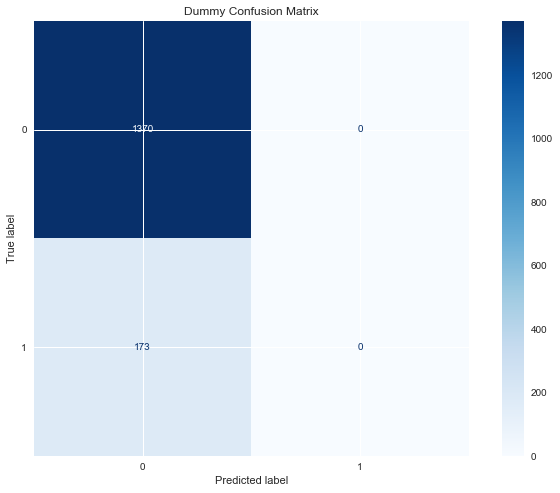

In [56]:
# plot confusion matrix
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(dummy_clf, _X_test_merged, y_test, cmap = 'Blues', values_format='d' , ax= ax)
ax.set_title('Dummy Confusion Matrix')
fig.savefig('Dummy_Confusion_Matrix');

## Logistic Regression

In [67]:
df.columns

Index(['Artists', 'Name', 'Weekly.rank', 'Peak.position', 'Weeks.on.chart',
       'Genre', 'Lyrics', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'id', 'uri', 'duration_ms', 'time_signature',
       'Top_10'],
      dtype='object')

In [68]:
modeling_df = df.drop(columns=['Artists', 'Name', 'Weekly.rank', 'Peak.position', 'Weeks.on.chart',
       'Genre', 'Lyrics','key','mode','id','uri','time_signature'])

In [71]:
modeling_df = pd.get_dummies(modeling_df)

In [72]:
modeling_df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Top_10
danceability,1.000000,-0.054431,-0.013078,0.354922,-0.235260,-0.032057,0.032858,0.180359,-0.022351,-0.174365,0.145199
energy,-0.054431,1.000000,0.719461,-0.049442,-0.517496,-0.096729,0.078162,0.389917,0.124526,0.002750,-0.052682
loudness,-0.013078,0.719461,1.000000,-0.163389,-0.398422,-0.240373,-0.002618,0.266795,0.107930,-0.011831,-0.011182
speechiness,0.354922,-0.049442,-0.163389,1.000000,-0.143136,0.000912,0.067027,-0.033853,0.147742,-0.133180,0.016371
acousticness,-0.235260,-0.517496,-0.398422,-0.143136,1.000000,0.097711,-0.155233,-0.117559,-0.130618,-0.032836,-0.004955
instrumentalness,-0.032057,-0.096729,-0.240373,0.000912,0.097711,1.000000,-0.005873,-0.045162,0.032308,-0.048835,-0.008050
liveness,0.032858,0.078162,-0.002618,0.067027,-0.155233,-0.005873,1.000000,0.009463,-0.012398,-0.007693,-0.003087
valence,0.180359,0.389917,0.266795,-0.033853,-0.117559,-0.045162,0.009463,1.000000,-0.013983,-0.185961,0.024386
tempo,-0.022351,0.124526,0.107930,0.147742,-0.130618,0.032308,-0.012398,-0.013983,1.000000,0.052899,-0.057888
duration_ms,-0.174365,0.002750,-0.011831,-0.133180,-0.032836,-0.048835,-0.007693,-0.185961,0.052899,1.000000,0.021423


In [73]:
target = modeling_df['Top_10']
df_features = modeling_df.drop(['Top_10'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=25,test_size=0.30)

In [81]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

log_f1 = metrics.f1_score(y_test, log_preds)
log_acc = metrics.accuracy_score(y_test, log_preds)

print(classification_report(y_test, log_preds, target_names=['Top 100','Top 10']))

              precision    recall  f1-score   support

     Top 100       0.90      1.00      0.95      2088
      Top 10       0.00      0.00      0.00       227

    accuracy                           0.90      2315
   macro avg       0.45      0.50      0.47      2315
weighted avg       0.81      0.90      0.86      2315



/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# ^^ this is showing us class imbalance

##### Dealing with class imbalance

In [83]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight = 'balanced')
lr_clf_weighted.fit(X_train, y_train)
y_weighted_train = lr_clf_weighted.predict(X_train)
y_weighted_test = lr_clf_weighted.predict(X_test)

f1_train = metrics.f1_score(y_train, y_weighted_train)
f1_test = metrics.f1_score(y_test, y_weighted_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_weighted_test))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Test Accuracy score:  0.6155507559395248
Train F1 score:  0.2722298221614227
Test F1 score:  0.27049180327868855


In [84]:
coef_names = list(zip(df_features.columns, lr_clf_weighted.coef_[0]))
coef_names

[('danceability', 3.511031640659277),
 ('energy', -1.8250217893449687),
 ('loudness', 0.09099396181803644),
 ('speechiness', 0.41936287802557976),
 ('acousticness', 0.13430477180424286),
 ('instrumentalness', 0.03653739743257231),
 ('liveness', -0.16448787901293402),
 ('valence', 0.3903706345578832),
 ('tempo', -0.008458741164467107),
 ('duration_ms', 2.9897908620949624e-06)]

In [ ]:
logreg = LogisticRegression()
parameters = {'C': [0.75,1.0,1.25,1.5],
             'max_iter': [100,200,300,400,500],
             'penalty': ['l1', 'l2']}
grid_tree1=GridSearchCV(logreg, parameters, cv=5, scoring='f1',verbose =1,n_jobs=-1)

grid_tree1.fit(X_train_resampled,y_train_resampled)

## Logistic Regression with GridSearch

## Random Forest 